# Importing Packages

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Data Loading

In [30]:
df = pd.read_excel('./data/population_ghi_unemploment_yearwise_import export_africa_sheet.xlsx')
df

,Year,Population,GHI,Unemployment Above age 15,Unemployment between age 15-24,Unemployment Above age 25+,Share of agricultural land in South Africa 2000-2020 in percentage,People employed in agricultural sector in millions,Total employment in Africa 2010-2021(In Millions),Import (US$ Thousand),Export (US$ Thousand),NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID,CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS,GASOLINE(USD)
0,1960,277118493,58.600464,9.481062,15.990643,5.855937,83.754950,43.362054,-113.816669,-4.280000e+07,-5.500000e+07,0.597,-121248.901500,-0.382550
1,1961,283779876,58.262490,9.570610,16.011023,6.001037,83.730961,45.402956,-102.516669,-4.110000e+07,-5.540000e+07,0.798,-120141.937700,-0.321401
2,1962,290712155,57.919486,9.414767,15.847811,5.871723,83.682760,47.175804,-91.091668,-3.900000e+07,-4.720000e+07,0.911,-119858.622400,-0.325281
3,1963,297898741,57.558272,9.451991,15.863546,5.945618,83.570931,49.944100,-80.858335,-3.640000e+07,-4.720000e+07,0.904,-121848.938700,-0.296721
4,1964,305365652,56.318315,9.389307,15.946707,5.897624,83.470854,50.208782,-75.891668,-3.720000e+07,-4.830000e+07,1.010,-108524.463400,-0.269731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,1252369090,25.211270,9.061706,17.975662,7.309926,79.420000,215.610000,441.400000,5.680835e+07,7.766913e+07,50.890,65868.000000,1.060000
59,2019,1283595475,25.236349,9.147912,18.148882,7.419412,79.420000,220.000000,453.600000,5.352592e+07,7.118801e+07,53.080,76312.000000,1.150000
60,2020,1315356983,25.261429,9.895824,19.603206,8.048294,79.420000,223.480000,451.200000,4.274483e+07,5.508914e+07,66.890,83004.000000,0.990000
61,2021,1347125535,25.321429,10.147794,19.492500,8.401750,79.420000,229.330000,466.100000,4.816218e+07,6.412994e+07,62.290,73684.906474,1.280000


# Handle Missing Data if Any

In [31]:

print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

Year                                                                  0
Population                                                            0
GHI                                                                   0
Unemployment Above age 15                                             0
Unemployment between age 15-24                                        0
Unemployment Above age 25+                                            0
Share of agricultural land in South Africa 2000-2020 in percentage    0
People employed in agricultural sector in millions                    0
Total employment in Africa 2010-2021(In Millions)                     0
Import (US$ Thousand)                                                 0
Export (US$ Thousand)                                                 0
NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID                           0
CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS                      0
GASOLINE(USD)                                                   

# Data Visualizations and PreProcessing

In [32]:
df['GHI'] = df['Population'] * (df['GHI']/100)
df = df.rename(columns={'GHI': 'NOPH'})


In [33]:
df.head()

,Year,Population,NOPH,Unemployment Above age 15,Unemployment between age 15-24,Unemployment Above age 25+,Share of agricultural land in South Africa 2000-2020 in percentage,People employed in agricultural sector in millions,Total employment in Africa 2010-2021(In Millions),Import (US$ Thousand),Export (US$ Thousand),NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID,CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS,GASOLINE(USD)
0,1960,277118493,1.623927e+08,9.481062,15.990643,5.855937,83.754950,43.362054,-113.816669,-42800000.0,-55000000.0,0.597,-121248.9015,-0.382550
1,1961,283779876,1.653372e+08,9.570610,16.011023,6.001037,83.730961,45.402956,-102.516669,-41100000.0,-55400000.0,0.798,-120141.9377,-0.321401
2,1962,290712155,1.683790e+08,9.414767,15.847811,5.871723,83.682760,47.175804,-91.091668,-39000000.0,-47200000.0,0.911,-119858.6224,-0.325281
3,1963,297898741,1.714654e+08,9.451991,15.863546,5.945618,83.570931,49.944100,-80.858335,-36400000.0,-47200000.0,0.904,-121848.9387,-0.296721
4,1964,305365652,1.719768e+08,9.389307,15.946707,5.897624,83.470854,50.208782,-75.891668,-37200000.0,-48300000.0,1.010,-108524.4634,-0.269731


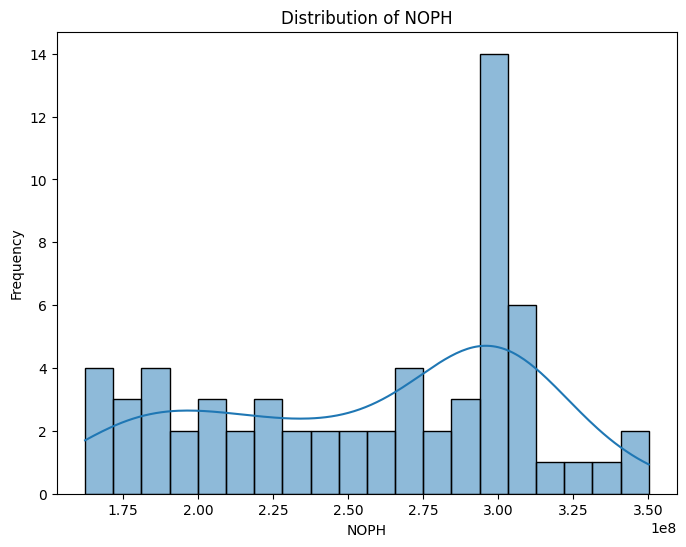

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df['NOPH'], bins=20, kde=True)
plt.title('Distribution of NOPH')
plt.xlabel('NOPH')
plt.ylabel('Frequency')
plt.show()

In [35]:
skewness = df['NOPH'].skew()
print(f"Skewness of NOPH distribution: {skewness}")

Skewness of NOPH distribution: -0.36468521486416405


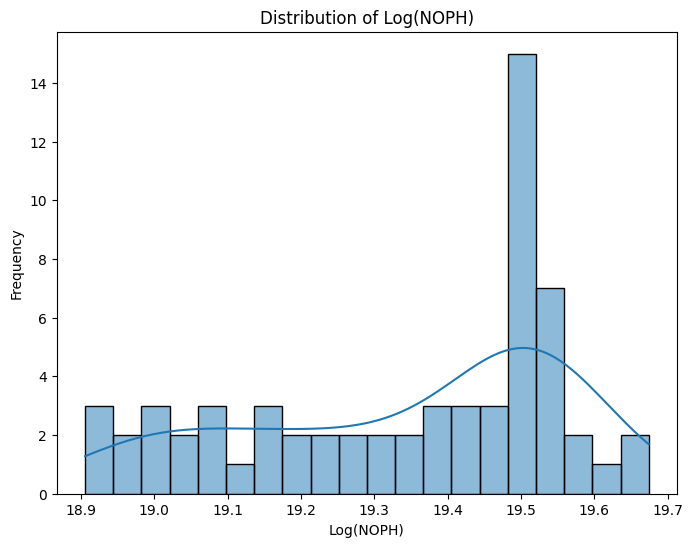

In [36]:
df['log_NOPH'] = np.log1p(df['NOPH'])

# Plot the transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['log_NOPH'], bins=20, kde=True)
plt.title('Distribution of Log(NOPH)')
plt.xlabel('Log(NOPH)')
plt.ylabel('Frequency')
plt.show()

# Feature Identification

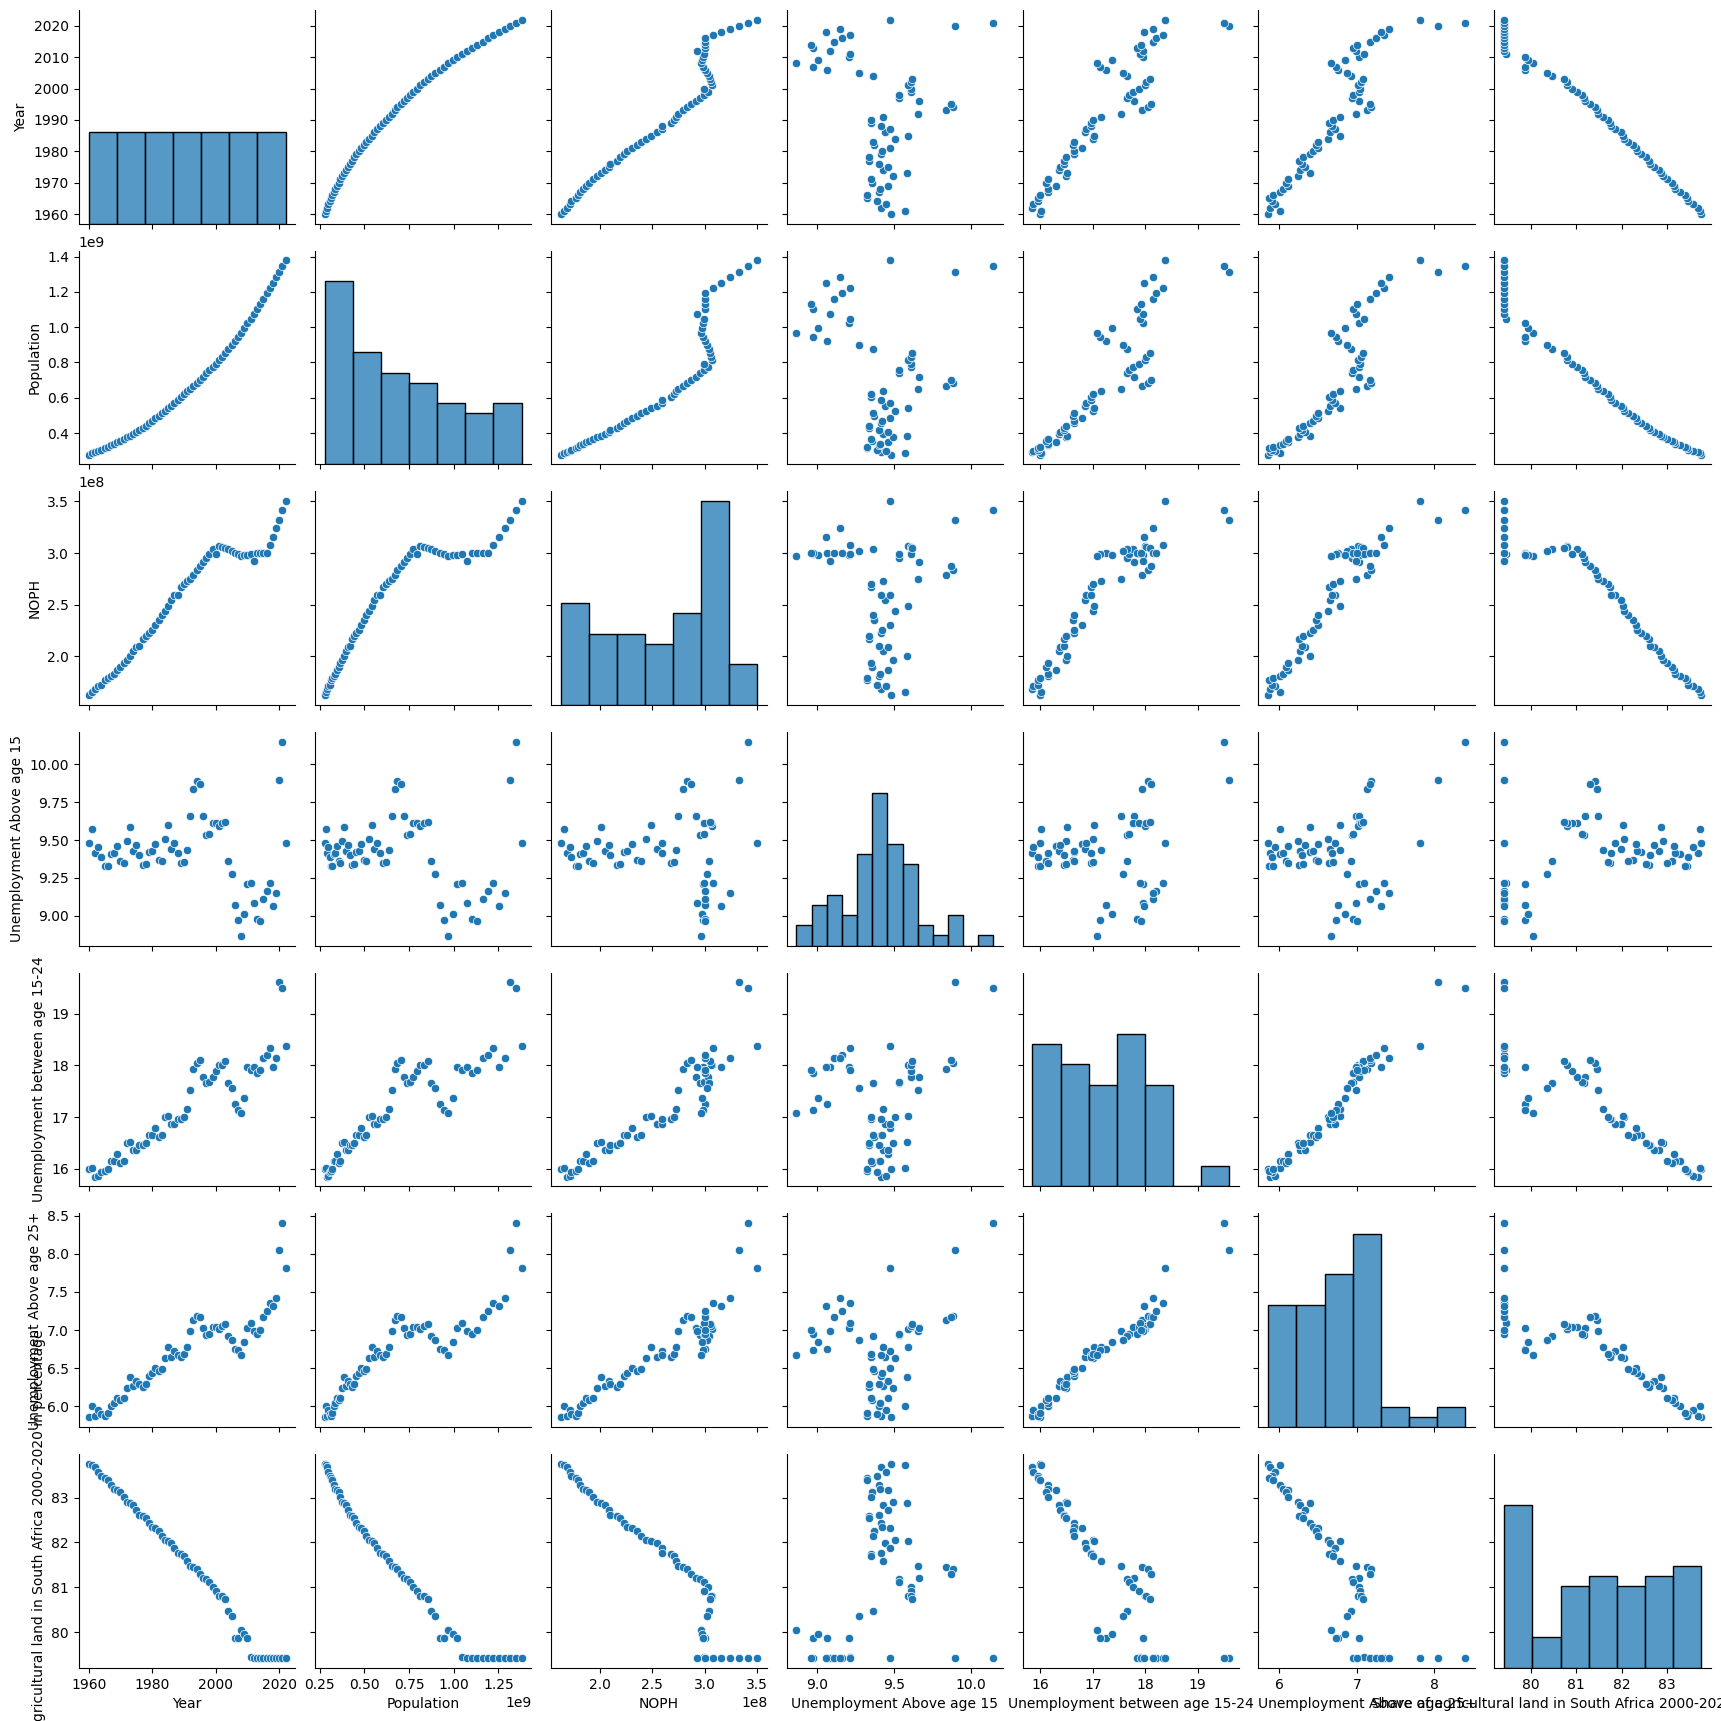

KeyboardInterrupt: 

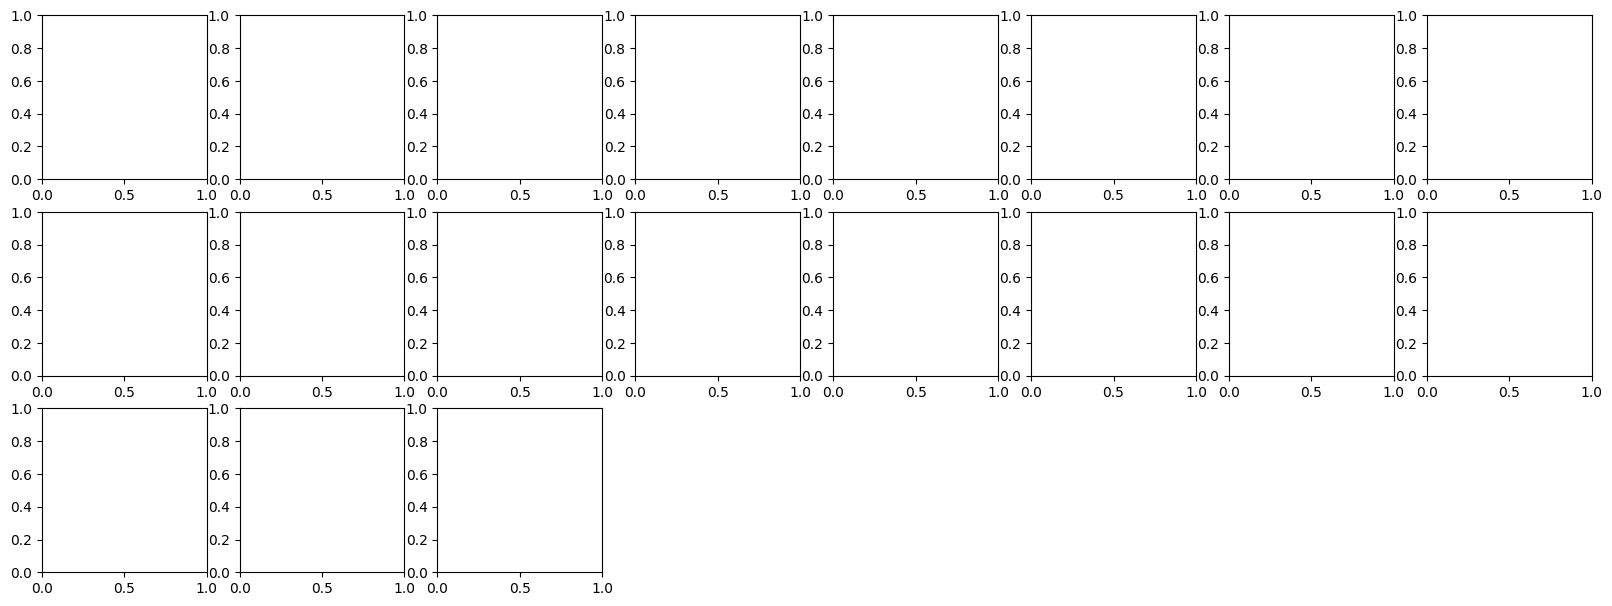

In [37]:
cols  = (df.columns.values)
firstset = cols[0:7]
secondset = cols[7:]
np.append(secondset, 'NOPH')
sns.pairplot(df[firstset])
plt.show()

sns.pairplot(df[secondset])
plt.show()


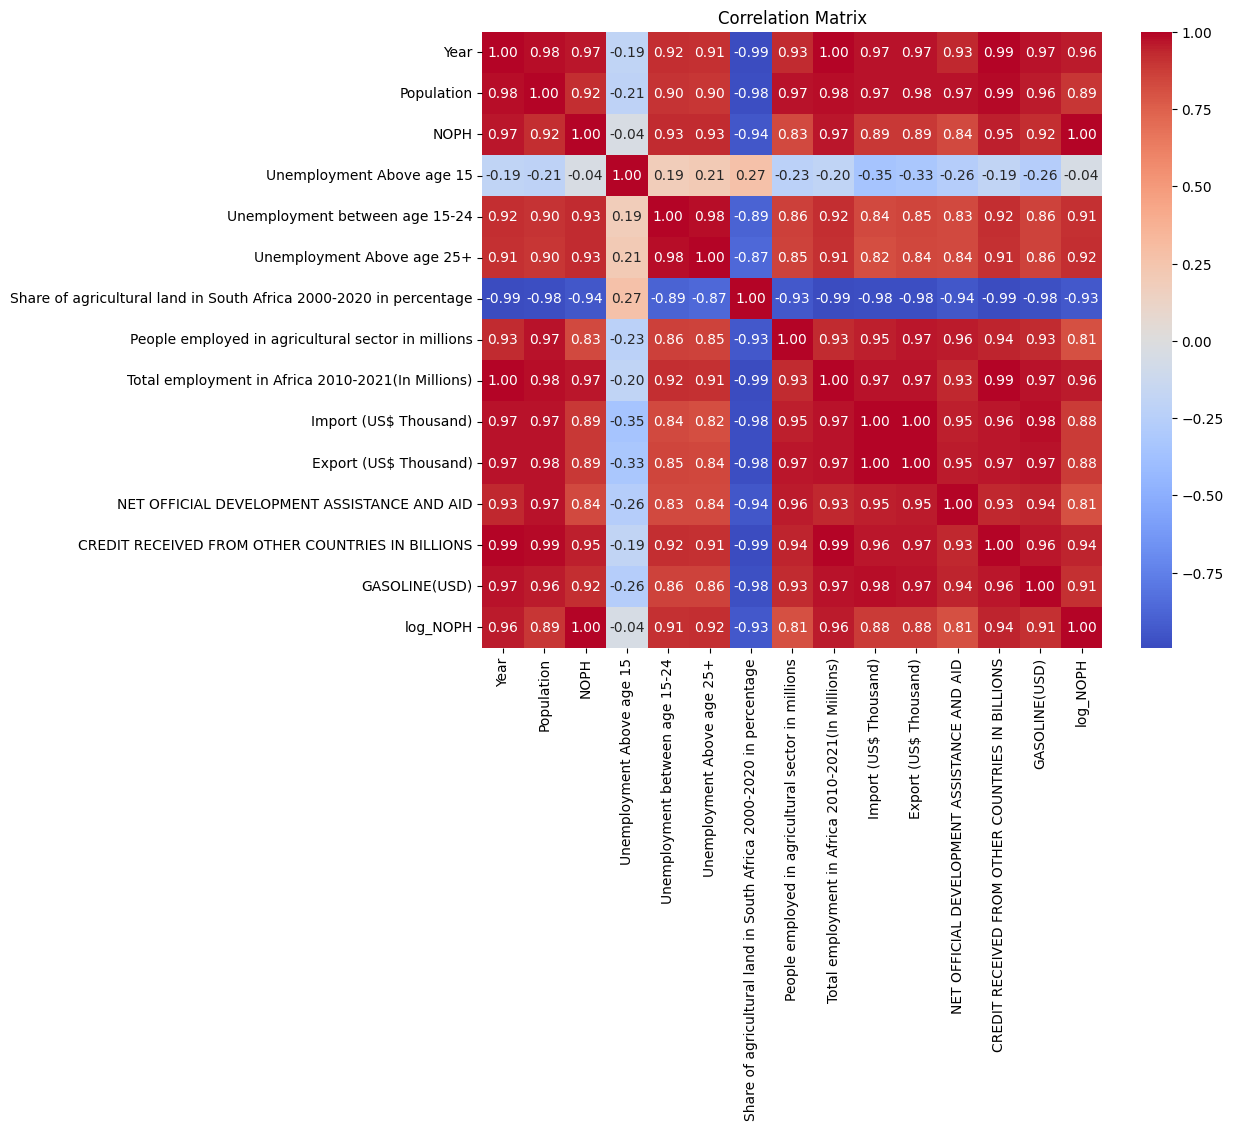

Selected Features:
['Population', 'Unemployment between age 15-24', 'Unemployment Above age 25+', 'Share of agricultural land in South Africa 2000-2020 in percentage', 'People employed in agricultural sector in millions', 'Total employment in Africa 2010-2021(In Millions)', 'Import (US$ Thousand)', 'Export (US$ Thousand)', 'NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID', 'CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS', 'GASOLINE(USD)']


In [38]:
correlation_matrix = df.corr()

# Plot the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Filter features highly correlated with NOPH (absolute correlation > 0.5)
selected_features = correlation_matrix['NOPH'].abs() > 0.5
selected_features = selected_features.drop(['NOPH', 'log_NOPH', 'Year'])  # Exclude NOPH and log_NOPH from selected features
selected_features = selected_features[selected_features].index.tolist()

print("Selected Features:")
print(selected_features)

In [39]:
# Listing the features that we wil be skipping
difference = [item for item in df.columns if item not in selected_features]
difference

['Year', 'NOPH', 'Unemployment Above age 15', 'log_NOPH']

# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Split Data into Training and Testing Sets
X_selected = df[selected_features]  # Select features based on correlation analysis
y = df['NOPH']  # Original NOPH values

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 2: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Evaluate Model Performance
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Model Evaluation:")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


Model Evaluation:
Train RMSE: 4246681.856590699
Test RMSE: 7025553.4868442


In [41]:
coefficients = pd.DataFrame({'Feature': X_selected.columns, 'Coefficient': model.coef_})
print("Coefficients:")
print(coefficients)

Coefficients:
                                              Feature   Coefficient
0                                          Population  4.614308e-02
1                      Unemployment between age 15-24  3.154385e+06
2                          Unemployment Above age 25+  1.826986e+07
3   Share of agricultural land in South Africa 200...  1.445596e+07
4   People employed in agricultural sector in mill... -2.962068e+05
5   Total employment in Africa 2010-2021(In Millions)  5.370346e+05
6                               Import (US$ Thousand) -2.771811e-01
7                               Export (US$ Thousand) -1.010044e-01
8         NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID -6.672090e+05
9    CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS -3.411036e+02
10                                      GASOLINE(USD)  2.888704e+07


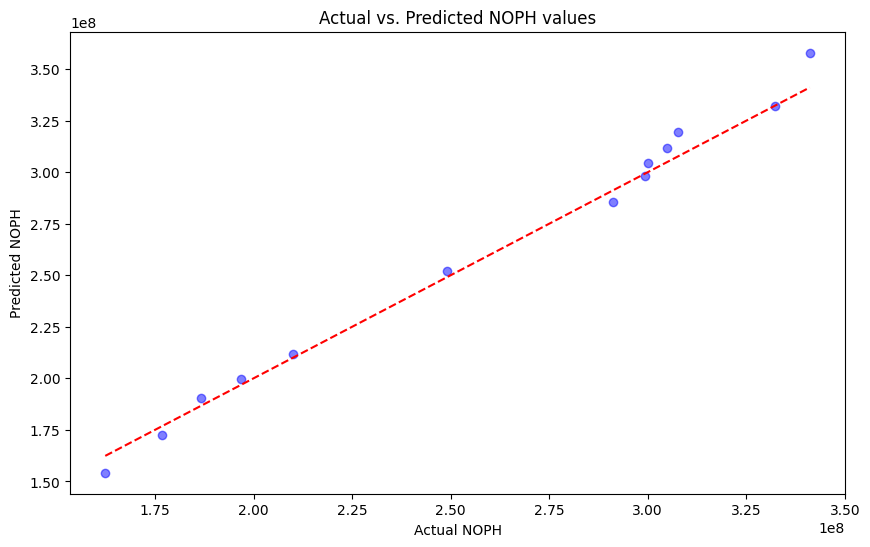

In [42]:
# Visualize actual vs. predicted NOPH values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted NOPH values')
plt.xlabel('Actual NOPH')
plt.ylabel('Predicted NOPH')
plt.show()

In [43]:
X_test.columns
coefficients = model.coef_
intercept = model.intercept_

# Get the feature names
feature_names = X_test.columns

# Construct the equation string
equation = f"y = {intercept}"
for i in range(len(coefficients)):
    equation += f" + ({coefficients[i]} * {feature_names[i]})"

print(equation)

y = -1200115193.6458724 + (0.04614307837438296 * Population) + (3154385.4318871214 * Unemployment between age 15-24) + (18269864.56248537 * Unemployment Above age 25+) + (14455964.158198975 * Share of agricultural land in South Africa 2000-2020 in percentage) + (-296206.82737886085 * People employed in agricultural sector in millions) + (537034.6152677379 * Total employment in Africa 2010-2021(In Millions)) + (-0.27718111616559327 * Import (US$ Thousand)) + (-0.10100442031398416 * Export (US$ Thousand)) + (-667208.9990467019 * NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID) + (-341.1035770406538 * CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS) + (28887044.4652642 * GASOLINE(USD))


# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Train a Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Evaluate Random Forest Model Performance
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_predictions))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_predictions))

print("Random Forest Model Evaluation:")
print(f"Train RMSE: {rf_train_rmse}")
print(f"Test RMSE: {rf_test_rmse}")


Random Forest Model Evaluation:
Train RMSE: 1900873.2804589276
Test RMSE: 2855993.315299571


# Storing Models

In [45]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_model_new.pkl')
joblib.dump(model, 'linear_regression_model_new.pkl')


['linear_regression_model_new.pkl']

In [46]:
X_test.columns

Index(['Population', 'Unemployment between age 15-24',
       'Unemployment Above age 25+',
       'Share of agricultural land in South Africa 2000-2020 in percentage',
       'People employed in agricultural sector in millions',
       'Total employment in Africa 2010-2021(In Millions)',
       'Import (US$ Thousand)', 'Export (US$ Thousand)',
       'NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID',
       'CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS', 'GASOLINE(USD)'],
      dtype='object')

In [47]:
df['NOPH']

0     1.623927e+08
1     1.653372e+08
2     1.683790e+08
3     1.714654e+08
4     1.719768e+08
          ...     
58    3.157382e+08
59    3.239326e+08
60    3.322780e+08
61    3.411114e+08
62    3.502722e+08
Name: NOPH, Length: 63, dtype: float64

In [48]:
df.head(-1)

,Year,Population,NOPH,Unemployment Above age 15,Unemployment between age 15-24,Unemployment Above age 25+,Share of agricultural land in South Africa 2000-2020 in percentage,People employed in agricultural sector in millions,Total employment in Africa 2010-2021(In Millions),Import (US$ Thousand),Export (US$ Thousand),NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID,CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS,GASOLINE(USD),log_NOPH
0,1960,277118493,1.623927e+08,9.481062,15.990643,5.855937,83.754950,43.362054,-113.816669,-4.280000e+07,-5.500000e+07,0.597,-121248.901500,-0.382550,18.905528
1,1961,283779876,1.653372e+08,9.570610,16.011023,6.001037,83.730961,45.402956,-102.516669,-4.110000e+07,-5.540000e+07,0.798,-120141.937700,-0.321401,18.923498
2,1962,290712155,1.683790e+08,9.414767,15.847811,5.871723,83.682760,47.175804,-91.091668,-3.900000e+07,-4.720000e+07,0.911,-119858.622400,-0.325281,18.941728
3,1963,297898741,1.714654e+08,9.451991,15.863546,5.945618,83.570931,49.944100,-80.858335,-3.640000e+07,-4.720000e+07,0.904,-121848.938700,-0.296721,18.959892
4,1964,305365652,1.719768e+08,9.389307,15.946707,5.897624,83.470854,50.208782,-75.891668,-3.720000e+07,-4.830000e+07,1.010,-108524.463400,-0.269731,18.962870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,1221635358,3.076834e+08,9.214662,18.329265,7.347397,79.420000,212.920000,429.700000,4.891357e+07,6.700154e+07,49.570,74787.000000,1.190000,19.544582
58,2018,1252369090,3.157382e+08,9.061706,17.975662,7.309926,79.420000,215.610000,441.400000,5.680835e+07,7.766913e+07,50.890,65868.000000,1.060000,19.570424
59,2019,1283595475,3.239326e+08,9.147912,18.148882,7.419412,79.420000,220.000000,453.600000,5.352592e+07,7.118801e+07,53.080,76312.000000,1.150000,19.596046
60,2020,1315356983,3.322780e+08,9.895824,19.603206,8.048294,79.420000,223.480000,451.200000,4.274483e+07,5.508914e+07,66.890,83004.000000,0.990000,19.621482
